# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [6]:
medical.shape

(1338, 8)

In [51]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The distribution of charges in this hospital is sharply right-skewed with a mean of about 13,270 USD and a standard deviation of about 12,110 USD. With a right-skewed distribution, most values are clustered to the left. For this data, it is better to use the median to best represent a typical observation.The median is about 9,382 USD compared to the mean of about 13,270 USD.

In [16]:
median = np.median(medical['charges'])
print(median)

9382.033


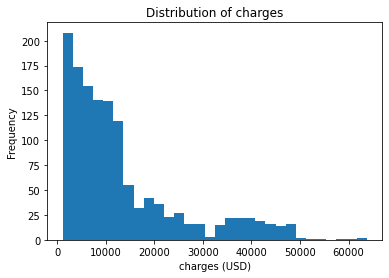

In [17]:

_= plt.hist(medical['charges'], bins=30)
_ = plt.xlabel('charges (USD)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of charges')

In [22]:
random_sample_mean = np.mean(medical['charges'])
std = np.std(medical['charges'])
print('The mean is', random_sample_mean, 'and the standard deviation is', std)

The mean is 13270.422265141257 and the standard deviation is 12105.484975561605


But since we are dealing with a sampling population, we can use the estimated standard deviation instead

In [23]:
std_est = np.std(medical['charges'], ddof=1)
print(std_est )

12110.011236693994


In [19]:
 # First quartile (Q1)
Q1 = np.percentile(medical['charges'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(medical['charges'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1
  
print(IQR)

11879.80148


The variability in observations is best captured by IQR, which is about 11,880 USD compared to the standard deviation of about 12,110 USD. In fairness, the IQR and standard deviation are comparable, so the standard deviation can also educate us on the variability of observations.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We have the statistics (mean and standard deviation) of the sample, and we assumed that these data represent a random sample of charges,we can find the 95% confidence inetrval of the mean using the t-distribution, since we are dealing with the standard deviation of a sample not the true value of the standard deviation of all charges in the hospital. The 95% margin of error can help check if the assumed mean of 12,000USD falls in the confidence interval.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The administrator shoul not be concerned since the suspected mean of 12,000 USD is outside the 95% confidence interval, which is between about 12,621 USD to 13,920 USD. The sample mean is included in the 95% confidence interval.

In [24]:
#t-critical value
t_critical = t.ppf(q = 0.975, df=len(medical['charges'])-1)
#margin or error 
margin_of_error_t = t_critical * (std_est /np.sqrt(len(medical['charges'])))
print(margin_of_error_t)

649.4682309486119


In [25]:
# confidence interval
confidence_interval_t = (random_sample_mean  - margin_of_error_t,
                       random_sample_mean  + margin_of_error_t) 
print(confidence_interval_t)

(12620.954034192644, 13919.890496089869)


Using a one-sided interval we can find the probability that themean is less or equal to 12,000 USD. To do that let's simulate the means of the sample we have

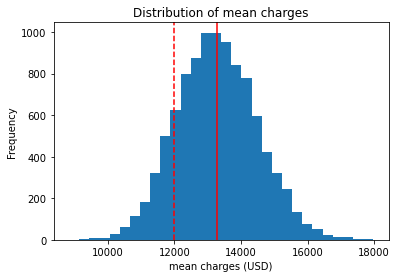

In [31]:
#Let's try a sample size of 10000 
means = []
for x in range (10000):
    mean = np.random.choice(medical['charges'], size = 100).mean()
    means.append(mean)
means = np.array(means)
_= plt.hist(means, bins=30)
_ = plt.xlabel('mean charges (USD)')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of mean charges')
_ = plt.axvline(random_sample_mean, color='r')
_ = plt.axvline(12000, color='r', linestyle='--')

In [36]:
norm.cdf(12000, random_sample_mean,std_est)

0.4582248901357676

Let's find the distribution of means by using our sample!! this can be counterintuitive since we are not using samples from the actual population. but at least it can show us where the value 12,000 USD resides on the curve of means in this sample. We are simulating 10,000 samples of size 100 each. It looks like the probability of having the mean of the charges equal to 12000 USD or less is significant (45.8%) but that's consistent with the Central Limit Theorem which states that as the size of samples increases, the distribution of means approach a normal distribution, in that case, the probability of having a value close to the actual mean or less is close to 50%. However, we have already calculated the 95% confidence interval and this value of 12000 USD falls outside the interval, which means that it is unlikely that the mean of the actual population of charges in the hospital has fallen to about 12,000 USD as the administrator has worryingly suspected.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis ($H_0$) would be that there is no difference between the charges for people with insurance and people without insurance, that is at the significance level, $\alpha = 0.05$, $\bar{x}_0 = \bar{x}_1$, with $\bar{x}_0$ being the mean of charges for people without insurance and $\bar{x}_1$, the mean charge for people with insurance. The alternative hypothesis is that $\bar{x}_0 \neq \bar{x}_1$. We are assuming that the variances of the two groups are the same ($\sigma_0^2 = \sigma_1^2$).

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [67]:
charges_1 = medical.charges[medical['insuranceclaim']==1]
charges_0 = medical.charges[medical['insuranceclaim']==0]

In [68]:
#std for charges without insurance, s0
s_0 = np.std(charges_0, ddof=1)
##std for charges with insurance, s1
s_1 = np.std(charges_1, ddof=1)
# size n0
n_0 = len(charges_0)
# size n1
n_1 = len(charges_1)
#pooled standard deviation
s_p = np.sqrt(((n_0 - 1) * s_0 ** 2 + (n_1 - 1) * s_1 ** 2) / (n_0 + n_1 - 2))
print(s_p)

11520.034268775256


In [69]:
#mean charge without insurance
x_0 = np.mean(charges_0)
#mean charge with insurance
x_1 = np.mean(charges_1)
#t_statistic
t_p = (x_0 - x_1) / (s_p * np.sqrt(1 / n_0 + 1/ n_1))

In [70]:
#p-value after comparison with the t 
p =  t.cdf(t_p,df=n_0+n_1 -2)


print("t = " + str(t_p))
print("p = " + str(2*p))

t = -11.89329903087671
p = 4.461230231620972e-31


In [74]:
## Cross Checking with the internal scipy function
a, b = charges_0, charges_1
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = -11.893299030876712
p = 4.461230231620717e-31


The manually calculated t-value is the same as the value from `scipy.stats` package. Also the `p-value` is the same. Since the `p-value` is far less than `0.05`, we reject the null hypothesis, and conclude that yes, on average people with insurance and people without insurance are charged differently.

In [75]:
print(x_0, x_1)

8821.421892306294 16423.928276537663


peaple without insurance are charged almost twice the charge of people with insurance on average.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ An equivalent z-test can be performed using `statsmodels.stats.weightstats.ztest()`

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test